<a href="https://colab.research.google.com/github/shanOnline99/Big-Mart-Sale-Prediction/blob/main/Big_Mart_Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RATHNAYAKA R.M.D.T.
# 2019/E/107
# DATA MINING
# LAB 02

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###In Lab session 2 I start the data engineering part.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive')


In [3]:
import shutil
shutil.copy("Big-Mart-Sale-Prediction/train_v9rqX0R.csv", "/content")

'/content/train_v9rqX0R.csv'

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import sweetviz as sv

In [8]:


trainDf = pd.read_csv("Big-Mart-Sale-Prediction/train_v9rqX0R.csv")
trainDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
testDf = pd.read_csv("Big-Mart-Sale-Prediction/test_AbJTz2l.csv")
testDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
ssDf = pd.read_csv("Big-Mart-Sale-Prediction/sample_submission_8RXa3c6.csv")
ssDf.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [ ]:
testDf.shape , trainDf.shape, ssDf.shape

((5681, 11), (8523, 12), (5681, 3))

In [ ]:
!pip install sweetviz

In [ ]:
tr = sv.analyze(trainDf)
tr.show_html('tr.html')

                                             |          | [  0%]   00:00 -> (? left)

Report tr.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **information about data**

In [ ]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


need to identify what are the catergorical and what are the numerical columns

In [ ]:
# Identify categorical columns
categorical_columns = trainDf.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical columns
numerical_columns = trainDf.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


only 5 features are numerical and 7 are catergorical

In [ ]:
trainDf[categorical_columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


*there are some missing values

In [ ]:
trainDf[numerical_columns].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [ ]:
print(trainDf.nunique()) #Finding unique instances

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


describe the target values

In [ ]:
trainDf['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
trainDf['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
trainDf['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
trainDf['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

there are some missing weights

In [ ]:
trainDf['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

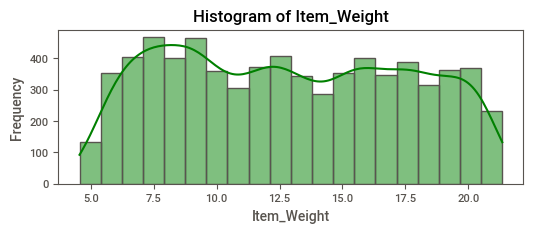

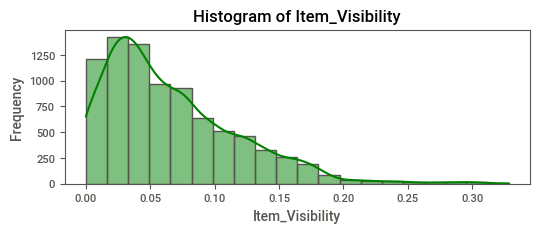

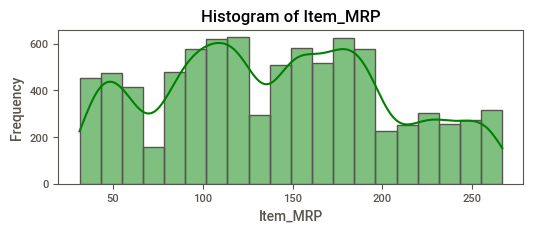

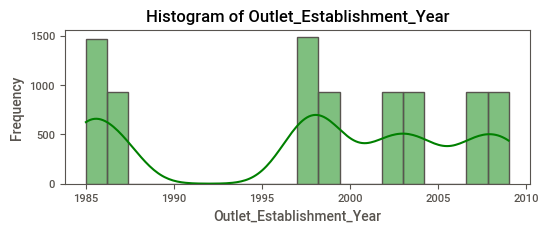

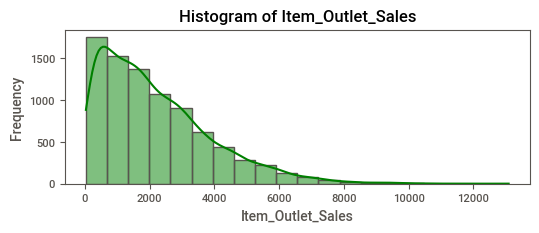

In [ ]:
import seaborn as sns

# Create histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 2))
    sns.histplot(trainDf[column], bins=20, kde=True, color='green')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


## check missing values in dataset

In [ ]:
# Check for missing values in each column
missing_values = trainDf.isnull().sum()

# Print the columns with missing values
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


there are only null values in items weights and the outlite size. other columns dont have any null values



*   List item
there are some strategies for handling missing values.in this dataset we need to fill these missing values. if we remove data , amount of data will be reduce.






##fill missing values in item weight and outlet size

In [ ]:
# Fill missing values in 'Item_Weight' with the mean
trainDf['Item_Weight'].fillna(trainDf['Item_Weight'].mean(), inplace=True)

# Fill missing values in 'Outlet_Size' with the mode
trainDf['Outlet_Size'].fillna(trainDf['Outlet_Size'].mode()[0], inplace=True)


In [ ]:
missing_values_fill = trainDf.isnull().sum()
print(missing_values_fill)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


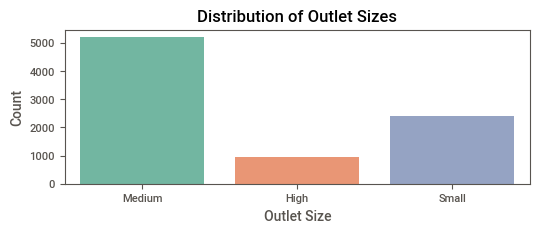

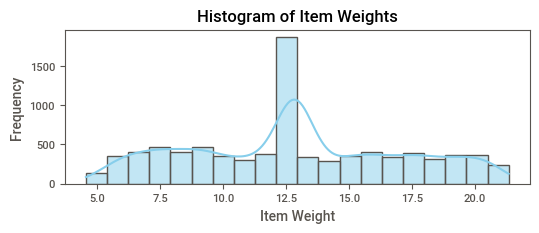

In [ ]:
# Create a bar plot for 'Outlet_Size'
plt.figure(figsize=(6, 2))
sns.countplot(data=trainDf, x='Outlet_Size', palette='Set2')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Distribution of Outlet Sizes')
plt.show()

# Create a histogram for 'Item_Weight'
plt.figure(figsize=(6, 2))
sns.histplot(data=trainDf, x='Item_Weight', bins=20, kde=True, color='skyblue')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Item Weights')
plt.show()


In [ ]:
trainDf['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

before filling missing values
* count    7060.000000
* mean       12.857645
* std         4.643456
* min         4.555000
* 25%         8.773750
* 50%        12.600000
* 75%        16.850000
* max        21.350000


In [ ]:
trainDf['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## Find outliers

Item_Weight                     Axes(0.125,0.11;0.133621x0.77)
Item_Visibility              Axes(0.285345,0.11;0.133621x0.77)
Item_MRP                      Axes(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    Axes(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            Axes(0.766379,0.11;0.133621x0.77)
dtype: object

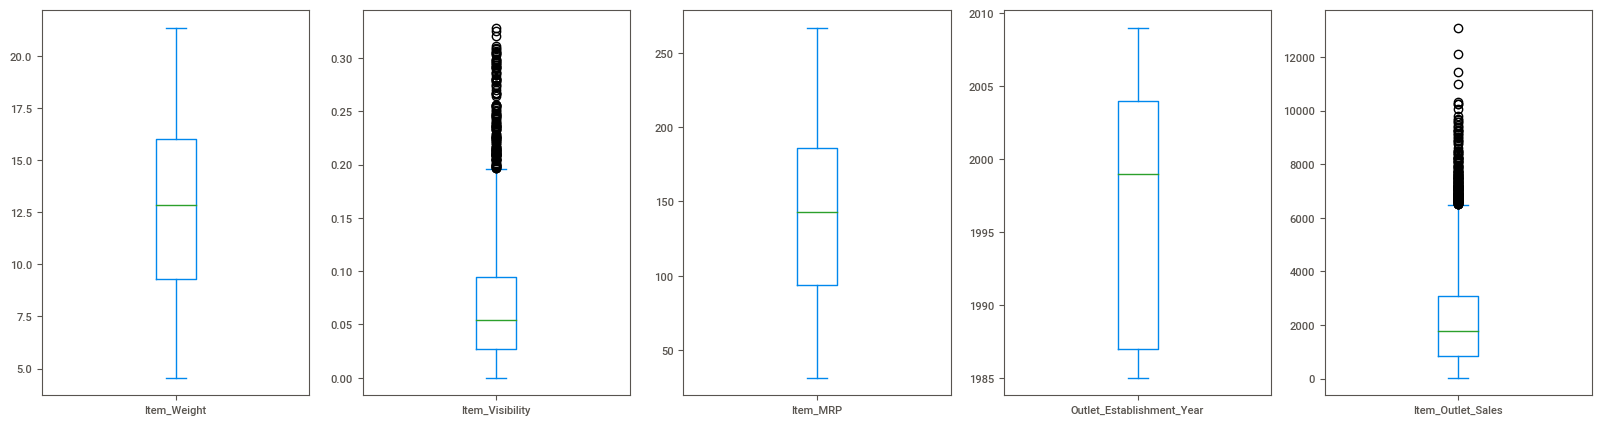

In [ ]:
trainDf.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

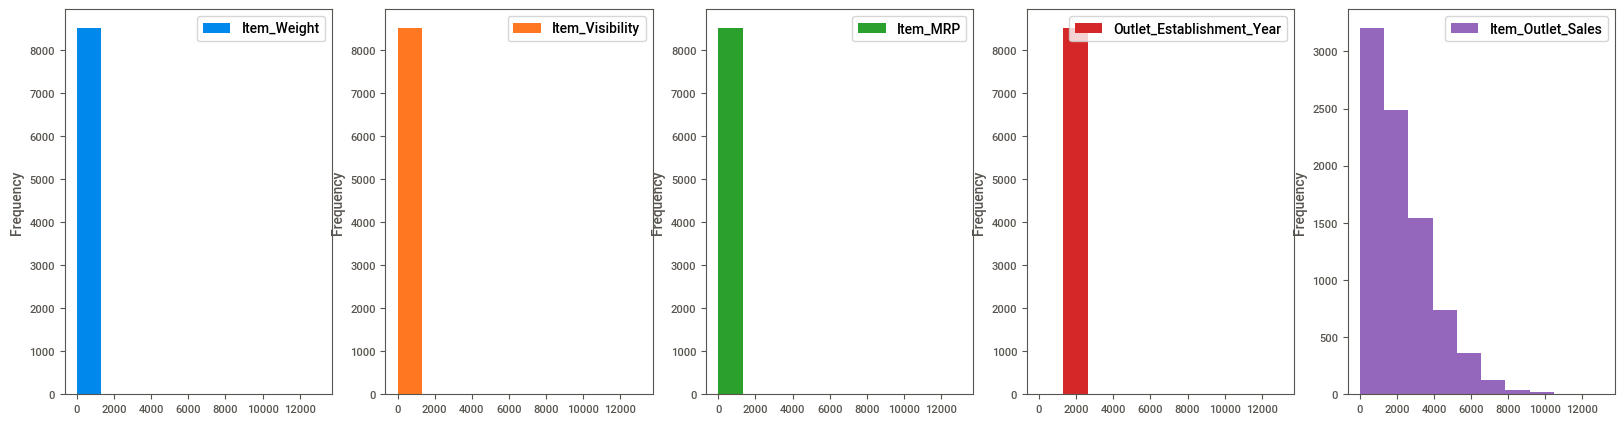

In [ ]:
trainDf.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

In [ ]:
trainDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#**LAB 03**
####Rathnayake R.M.D.T.
####3 november 2023
####prevous works included in *above*

#**Test data set**

In [4]:
import shutil
shutil.copy("Big-Mart-Sale-Prediction/test_AbJTz2l.csv", "/content")

'/content/test_AbJTz2l.csv'

In [11]:
testDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We can see in test dataset there are 11 Features. 4 of features are Numerical and others are categorical. Lets explore Categorical and some Neumarical Features for better understand the data set

In [14]:
categorical_columns_1 = list(testDf.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns_1))

numerical_columns_1 = list(testDf.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns_1))

Categorical columns:
 ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical columns:
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [15]:
testDf[categorical_columns_1].head() #categorical features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [18]:
print(testDf.nunique()) #Finding unique instances

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64


In [20]:
testDf['Item_Visibility'].describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [21]:
testDf['Item_Identifier'].value_counts()

DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

We can see some duplicate items but it may be possible since there are several outlets.

In [23]:
testDf['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [24]:
testDf['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [25]:
testDf['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

there are 10 target values

In [26]:
testDf['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

In [27]:
testDf['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [28]:
testDf['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [29]:
testDf['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

## Numerical features of the test dataset

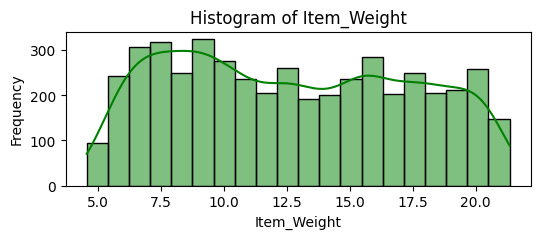

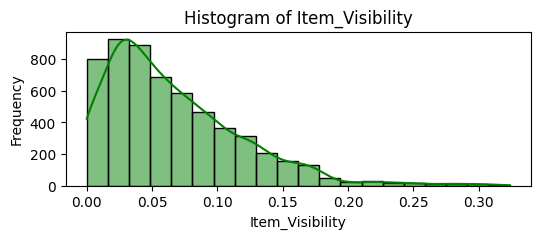

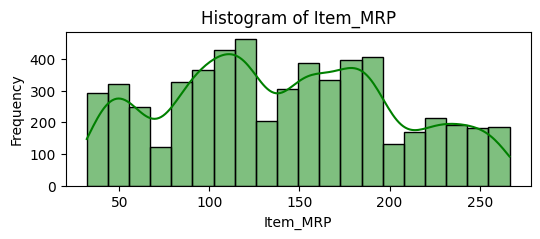

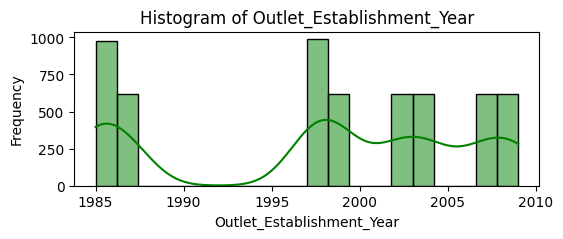

In [31]:
import seaborn as sns

# Create histograms for each numerical column
for column in numerical_columns_1:
    plt.figure(figsize=(6, 2))
    sns.histplot(testDf[column], bins=20, kde=True, color='green')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


In [32]:
print('Skewness of the distribution of Item_Weight: %f' % testDf['Item_Weight'].skew())
print('Kurtsis of the distribution of Item_Weight: %f' %testDf['Item_Weight'].kurt())

Skewness of the distribution of Item_Weight: 0.129975
Kurtsis of the distribution of Item_Weight: -1.226412


In our analysis, we've observed several noteworthy points. Firstly, the test and train datasets demonstrate a striking resemblance, which is advantageous for developing and evaluating predictive models. This similarity allows us to train a model on one dataset and assess its performance on the other. However, there are certain anomalies in the data that require attention. For instance, the presence of items with zero visibility in the "Item Visibility" attribute is impractical in a retail context, as products must be visible to be sold. Addressing or investigating these data points is crucial for data accuracy. Additionally, the "Outlet Establishment Year" attribute spans from 1985 to 2009, but to better understand its impact on sales, it would be more informative to convert these years into the age of each store. Finally, the lower "count" of values in "Item_Weight" and "Outlet_Size" indicates the presence of missing data, necessitating appropriate handling, such as imputation or data removal, to ensure the dataset's integrity.

#Find Null in TestDf

In [33]:
testDf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

##fill null values

In [34]:
# Fill missing values in 'Item_Weight' with the mean
testDf['Item_Weight'].fillna(trainDf['Item_Weight'].mean(), inplace=True)

# Fill missing values in 'Outlet_Size' with the mode
testDf['Outlet_Size'].fillna(trainDf['Outlet_Size'].mode()[0], inplace=True)

In [36]:
testDf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [37]:
testDf['Outlet_Size'].describe()

count       5681
unique         3
top       Medium
freq        3468
Name: Outlet_Size, dtype: object